### Part 1:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import GMM

In [2]:
df = pd.read_csv('/Users/celty/Desktop/MBAN 5110/Midterm/midterm_partone.csv')

In [3]:
df

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446
...,...,...,...,...,...,...,...,...
1691,1,-0.015543,5.225766,0.309119,1.615384,3.554503,2.197871,0.005549
1692,1,0.399089,5.324390,0.274782,1.463044,3.745006,2.324502,0.004359
1693,1,-0.702200,5.575258,0.287503,1.602905,3.434909,2.282626,0.000000
1694,1,0.283926,5.423463,0.256657,1.391968,2.876645,1.454948,0.000000


In [4]:
model_iv = sm.OLS(df["Inventory Turnover"],df[["Constant","Current Ratio","Quick Ratio",\
                                                                 "Debt Asset Ratio"]]).fit()
endog_predict = model_iv.predict(df[["Constant","Current Ratio","Quick Ratio","Debt Asset Ratio"]])
df["Endogenous Param"] = endog_predict

In [5]:
model_2sls = sm.OLS(df["Stock Change"], df[["Constant","Endogenous Param",\
                                                              "Operating Profit","Interaction Effect",\
                                                             ]]).fit()
model_2sls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock Change   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.530
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.27e-05
Time:                        22:00:45   Log-Likelihood:                -1186.5
No. Observations:                1696   AIC:                             2381.
Df Residuals:                    1692   BIC:                             2403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant              -0.0176      0.020     -0.896      0.370      -0.056       0.021
Endogenous Param       0.0011      0.001      1.827      0.068   -7.76e-05       0.002
Operating Profit      -0.1201      0.028     -4.319      0.000      -0.175      -0.066
Interaction Effect     0.0014      0.000      3.621      0.000       0.001       0.002
==============================================================================
Omnibus:                      368.832   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3433.920
Skew:                           0.742   Prob(JB):                         0.00
Kurtosis:                       9.811   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y_vals  = np.array(df["Stock Change"])
x_vals  = np.array(df[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(df[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3 = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = error0 * exog[:,1]
        error2 = error0 * exog[:,2]
        error3 = error0 * inst[:,0] 
        error4 = error0 * inst[:,1] 
        error5 = error0 * inst[:,2] 

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=4).fit(beta0)

res.summary()

Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000373
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6317
Model:                            gmm   Prob (Hansen J):                 0.729
Method:                           GMM                                         
Date:                Fri, 10 Nov 2023                                         
Time:                        22:00:45                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0200      0.021     -0.964      0.335      -0.061       0.021
p 1            0.0011      0.001      1.843      0.065   -6.89e-05       0.002
p 2           -0.1071      0.032     -3.370      0.001      -0.169      -0.045
p 3            0.0011      0.000      2.760      0.006       0.000       0.002
==============================================================================
"""

In [7]:
class gmm_modified(GMM):
    def momcond(self, params):
        p0, p1, p2, p3, delta = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = error0 * exog[:,1]
        error2 = error0 * exog[:,2]
        error3 = (error0 - delta) * inst[:,0] 
        error4 = (error0 - delta) * inst[:,1] 
        error5 = (error0 - delta) * inst[:,2] 

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
res = gmm_modified(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=5).fit(beta0)

res.summary()

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000205
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000205
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000205
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             gmm_modified Results                             
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.3475
Model:                   gmm_modified   Prob (Hansen J):                 0.556
Method:                           GMM                                         
Date:                Fri, 10 Nov 2023                                         
Time:                        22:00:45                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0139      0.024     -0.588      0.556      -0.060       0.033
p 1            0.0009      0.001      1.217      0.224      -0.001       0.002
p 2           -0.1103      0.032     -3.416      0.001      -0.174      -0.047
p 3            0.0012      0.000      2.782      0.005       0.000       0.002
p 4           -0.0048      0.009     -0.534      0.594      -0.022       0.013
==============================================================================
"""

### Part 2:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [9]:
df2= pd.read_csv('/Users/celty/Desktop/MBAN 5110/Midterm/midterm_parttwo.csv')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Years of Education after High School  8081 non-null   int64 
 1   Requested Credit Amount               8081 non-null   object
 2   Number of Dependents                  8081 non-null   object
 3   Monthly Income                        8081 non-null   object
 4   Monthly Expense                       8081 non-null   object
 5   Marital Status                        8081 non-null   object
 6   Credit Rating                         8081 non-null   object
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


In [11]:
df2.describe(include='all')

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
count,8081.000000,8081,8081,8081,8081,8081,8081
unique,NaN,3,3,5,5,3,2
top,NaN,Low,Less than 2,Very low,Very low,Married,Positive
freq,NaN,5442,3616,3183,6243,5876,6935
mean,2.608588,NaN,NaN,NaN,NaN,NaN,NaN
std,1.571835,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


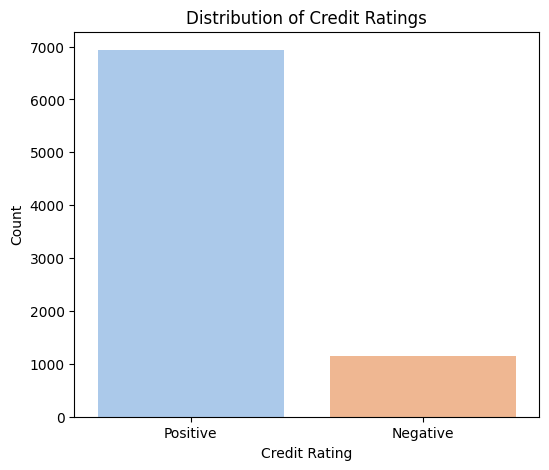

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
sns.countplot(x='Credit Rating', data=df2, palette='pastel')
plt.title('Distribution of Credit Ratings')
plt.xlabel('Credit Rating')
plt.ylabel('Count')
plt.show()

# A potential imbalance data problem exists from the chart.

In [13]:
# Define the columns
X = df2.drop('Credit Rating', axis=1)
y = df2['Credit Rating'].apply(lambda x: 1 if x == 'Positive' else 0)

In [14]:
cat_columns = X.select_dtypes(include=['object']).columns
num_columns = X.select_dtypes(include=['int64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_columns),
        ('num', StandardScaler(), num_columns)])

In [15]:
log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [17]:
log.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['Requested Credit Amount', 'Number of Dependents', 'Monthly Income',
       'Monthly Expense', 'Marital Status'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Years of Education after High School'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [18]:
y_pred = log.predict(X_test)

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[   0,  577],
       [   0, 3464]])

In [21]:
metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1 Score"],
    "Value": [precision, recall, f1]
})

metrics_df

,Metric,Value
0,Precision,0.857214
1,Recall,1.000000
2,F1 Score,0.923118


In [22]:
y_pred_proba = log.predict_proba(X_test)[:, 1]

# Calculate the threshold for the top 15% of probabilities
threshold = np.percentile(y_pred_proba, 85)

y_pred_adj = (y_pred_proba >= threshold).astype(int)

In [23]:
conf_matrix_adj = confusion_matrix(y_test, y_pred_adj)
recall_adj = recall_score(y_test, y_pred_adj)
precision_adj = precision_score(y_test, y_pred_adj)
f1_adj = f1_score(y_test, y_pred_adj)

In [24]:
conf_matrix_adj 

array([[ 496,   81],
       [2937,  527]])

In [25]:
metrics_adj_df = pd.DataFrame({
    "Metric": ["Threshold","Precision", "Recall", "F1 Score"],
    "Value": [threshold, precision_adj, recall_adj, f1_adj]
})

metrics_adj_df

,Metric,Value
0,Threshold,0.887536
1,Precision,0.866776
2,Recall,0.152136
3,F1 Score,0.258841


Part 1:

Initial 2SLS Insights:

•	The initial a 2SLS regression addresses potential endogeneity in the model. The results indicate that the model has low explanatory power (R-squared of 0.015). 

•	Operating Profit and Interaction Effect has strong predictive power on “Stock Change” but the “Endogenous Parameter” is not statistically significant (P-value of 0.068>0.05).

GMM analysis:

•	Hansen J of 0.6317 with a Prob (Hansen J) of 0.729: This indicates that the instruments are valid, as it suggests the null hypothesis of the instruments being appropriately uncorrelated with the error term cannot be rejected.

•	Coefficients & Statistical Significance: 

a.	The coefficient of Inventory Turnover (p1) is positive (0.0011) across both 2SLS and GMM analyses, but with little significance (p=0.068 in 2SLS and p=0.065 in GMM), indicating a negligible effect on Stock Change. 

b.	Operating Profit (p2) shows a strong negative correlation with Stock Change (coefficient = -0.1071, p=0.001 in GMM). Interaction Effect (p3) has a significant positive association (coefficient = 0.0011, p = 0.006 in GMM). 

c.	The operating profit's impact on a retailer's performance is influenced by their inventory turnover with a threshold at 97 (0.1071/0.0011). Below 97, higher operating profits can indicate a focus on profits over efficient inventory management, potentially leading to excess unsold stock. Above 97, increased operating profits generally reflect better overall performance.

Addressing Instrumental Bias:

The claim that ZT(Y−XB) = δ × [1,1,1] T where δ is non-zero suggests that the instruments are not perfectly exogenous and correlated with the error term, introducing a bias into the model. This undermines the reliability of the instruments. Therefore, an GMM update with the incorporation of δ is required to correct this bias in order to make more trustworthy estimates.

Modified GMM Examination:

•	Hansen J Test of 0.3475 with a Prob (Hansen J) of 0.556 tests the overall validity of the instruments. A high p-value here (> 0.05) suggests that the null hypothesis that the instruments are valid cannot be rejected. This means that the instruments appear to be appropriately uncorrelated with the error term and are adequately exogenous.

•	Coefficients & Statistical Significance: 

a.	Constant (p0): Coefficient -0.0139 with a p-value of 0.556. This has a negative relationship with Stock Change but is not statistically significant (>0.05).

b.	Inventory Turnover (p1): Coefficient 0.0009 with a p-value of 0.224. This has a positive correlation with Stock Change but is also not statistically significant.

c.	Operating Profit (p2): Coefficient -0.1103 with a p-value of 0.001. This is statistically significant and indicates a strong negative relationship.

d.	Interaction affect (p3): Coefficient 0.0012 with a p-value of 0.005. This is statistically significant with a strong positive relationship. The new threshold for Inventory Turnover that the operating profit's impact on a retailer's performance is approximately 91.92 (0.1103/0.0012). 

•	Delta: Coefficient -0.0048 with a p-value of 0.594. Delta is supposed to capture the alleged bias in the moment conditions. A statistically significant delta would indicate that the moment conditions are biased. However, given its high p-value, delta is not statistically significant, suggesting that the claim of bias is not supported.

Justifications of the Expert's Claim:

The analysis above suggests that the claim of bias in the moment conditions of the instrumental variables is not substantiated by the statistical evidence. Firstly, the coefficient for delta, which is designed to capture any potential bias, is not statistically significant, with a high p-value of 0.594. This indicates that the moment conditions are not significantly biased as claimed. Additionally, the Hansen J statistic, which measures the validity of instruments, shows no signs of instrument invalidity with a high p-value of 0.556. Furthermore, the key relationships in the model remain consistent regardless of the inclusion of the delta term, and the validity of the instruments is affirmed in both models, as indicated by the Hansen J statistics. Therefore, based on the available statistical evidence from the GMM analysis, the individual's claim of a biased moment condition does not hold ground.

Part 2:

Logistic Regression Examination:

•	Confusion Matrix:  

The initial confusion matrix showed a strong bias in the model towards approving all credit applications, resulting in no true or false negatives (rejections), and a high number of false positives (model approves a loan for an applicant who is actually at a higher risk of defaulting). This suggests that the model can not effectively differentiate between creditworthy and non-creditworthy applicants.

•	Recall: 1.0: The model's high recall indicates it correctly identified all instances of fully repaid credits. This suggests the bank didn't miss lending opportunities to reliable customers. However, the lack of negative predictions raises concerns about the model's low threshold or bias towards loan approvals.

•	Precision: 0.8572: This shows that approximately 85.72% of loans predicted as positive by the model were actually positive, suggesting a repayment likelihood for these loans. However, it also implies that about 14.13% of approved loans might be at risk of non-repayment.

•	F1 Score: 0.9231: The high F1 score balances precision and recall, indicates strong model performance. However, its reliability is questionable due to the model's favoring of loan approvals and its failure to predict any negative instances, suggesting potential issues with class imbalance or model fitting.

15% Threshold Setting Results Analysis:

The threshold significantly reduces the recall score and slightly improves the precision score, implying higher accuracy in identifying clients with good credit ratings and reducing the risk of client defaults.

•	Threshold for Approval: 0.8875: This serves as the decisive cut-off in the bank's credit approval process. Applications with a prediction probability equal or above this threshold are approved, indicating a high likelihood of credit repayment. Conversely, applications falling below this threshold are rejected, reflecting a lower probability of successful repayment. This threshold represents the bank's strategic balance between risk management and loan approval.

•	Updated Confusion Matrix:  

With this new threshold, the model shows significant improvements in risk management and approval precision. True negatives increased from 0 to 496, indicating better identification and rejection of high-risk loans; false positives decreased from 577 to 81, reflecting a more cautious approval process; and true positives dropped from 3464 to 527, signifying a stricter loan approval policy. Overall, these changes align with a strategy to minimize defaults.

•	Recall: 0.1521: The significant decrease from 100% to 15.21% indicates that the model correctly identifies only about 18.01% of creditworthy applicants. While this lowers the risk of non-repayment, it also risks overlooking many potential customers who are likely to repay their loans.

•	Precision: 0.8667: The increased precision suggests that about 87.66% of the approved loans are likely to be repaid, aligning with the bank's risk minimization goal but indicating a stricter lending policy.

•	F1 Score: 0.2588: The decreased F1 score reflects the trade-off between precision and recall, aiming for high precision while lowering recall. This reduces market penetration and potential revenue, yet it also lowers the risk of non-repayment.

In conclusion, the adjusted credit approval model demonstrates a trade-off between risk management and market expansion. Initially, the model favored inclusivity and market growth, but it shifted to a stricter approach after adjustment, reducing default risks while potentially excluding some creditworthy customers. This could impact the bank's stability, particularly in smaller cities and villages. The bank must balance minimizing non-repayment risks with avoiding overly conservative strategies that could limit its expansion, especially in new markets. However, the dataset initially shows an imbalance in classes, with far more clients having good credit ratings than negative ones. This indicates a potential bias in logistic regression predictions, which may need further data collection and model improvements.
